Task 1: Implement a Perceptron from Scratch

In [267]:
import numpy as np
import matplotlib.pyplot as plt

In [268]:
#data

or_data= np.array([[0,0],[0,1],[1,0],[1,1]])
or_labels = np.array([0,1,1,1])

and_data= np.array([[0,0],[0,1],[1,0],[1,1]])
and_labels = np.array([0,0,0,1])

xor_data= np.array([[0,0],[0,1],[1,0],[1,1]])
xor_labels = np.array([0,1,1,0])

In [269]:
class Perceptron:

  def __init__(self,n, epochs=10, learning_rate=0.1):
    self.weights= np.random.randn(n,1)
    self.bias= np.random.randn()
    self.epochs=epochs
    self.learning_rate=learning_rate

  def step_activation_fn(self,x):
     return np.where(x >= 0, 1, 0)

  def fit(self,X,y):
    loss=[]
    for epoch in range(self.epochs):
      total_loss=0
      for x, label in zip(X,y):
        x= x.reshape(1,-1)
        z= np.dot(x,self.weights)+self.bias
        y_pred= self.step_activation_fn(z)
        error= label-y_pred
        self.weights+= self.learning_rate*error*x.T
        total_loss += abs(int(error.item()))
      loss.append(total_loss)
      if total_loss ==0:
        print("Training completed after ", epoch, "epochs")
        break
    return loss

  def predict(self,X):
    X = np.atleast_2d(X)
    z= np.dot( X,self.weights) + self.bias
    y_pred= self.step_activation_fn(z)
    return y_pred


Or Gate:


In [270]:
n=len(or_data[0])
or_model= Perceptron(n,epochs=100)
loss=or_model.fit(or_data, or_labels)
y_pred= [or_model.predict(or_data_x).item() for or_data_x in or_data]
print("Training loss: ", loss)
print("Actual labels: \n", or_labels,"Predicted labels: \n", y_pred)


Training loss:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual labels: 
 [0 1 1 1] Predicted labels: 
 [1, 1, 1, 1]


And Gate:

In [271]:
n=len(and_data[0])
and_model= Perceptron(n,epochs=100)
loss=or_model.fit(and_data, and_labels)
y_pred= [and_model.predict(and_data_x).item() for and_data_x in and_data]
print("Training loss: ", loss)
print("Actual labels: \n", or_labels,"Predicted labels: \n", y_pred)

Training loss:  [3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Actual labels: 
 [0 1 1 1] Predicted labels: 
 [0, 1, 1, 1]


XOR Gate:

In [272]:
n= len(xor_data[0])
xor_model= Perceptron(n,epochs=100)
loss=xor_model.fit(xor_data, xor_labels)
y_pred= [xor_model.predict(xor_data_x).item() for xor_data_x in xor_data]
print("Training loss: ", loss)
print("Actual labels: \n", xor_labels,"Predicted labels: \n", y_pred)


Training loss:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Actual labels: 
 [0 1 1 0] Predicted labels: 
 [0, 0, 0, 0]


A single perceptron is unable to train non-linear xor data

In [273]:
for gate, input, label in zip(['or', 'and', 'xor'], [or_data, and_data, xor_data], [or_labels, and_labels, xor_labels]):
  n= len(input[0])
  model= Perceptron(n,epochs=100)
  loss=model.fit(input, label)
  y_pred= [model.predict(input_x).item() for input_x in input]
  print("Training loss for ", gate, " gate: ", loss)
  print("Actual labels: \n", label,"Predicted labels: \n", y_pred)
  print()

Training loss for  or  gate:  [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual labels: 
 [0 1 1 1] Predicted labels: 
 [1, 1, 1, 1]

Training loss for  and  gate:  [3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Actual labels: 
 [0 0 0 1] Predicted labels: 
 [1, 1, 1, 1]

Training loss for  xor  gate:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

Task 2: Perceptron for Binary Classification

In [274]:
import pandas as pd
df= pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [275]:
df= df[df['species'].isin(['setosa','versicolor'])]
df['species']=df['species'].map({'setosa':0,'versicolor':1})
df['species'].value_counts()

<ipython-input-275-e78a0a77bdcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'setosa':0,'versicolor':1})


,count
species,
0,50
1,50


In [276]:
df.shape

(100, 5)

In [277]:
df=df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [278]:
n=df.shape[1]-1
iris_model= Perceptron(n,epochs=200)
loss=iris_model.fit(df.iloc[:,:-1].values, df.iloc[:,-1].values)
loss= np.array(loss)/df.shape[0]
y_pred= [iris_model.predict(df_x) for df_x in df.iloc[:,:-1].values]
print("Percentage Training loss per epoch: ", loss)

Training completed after  4 epochs
Percentage Training loss per epoch:  [0.06 0.02 0.03 0.01 0.  ]


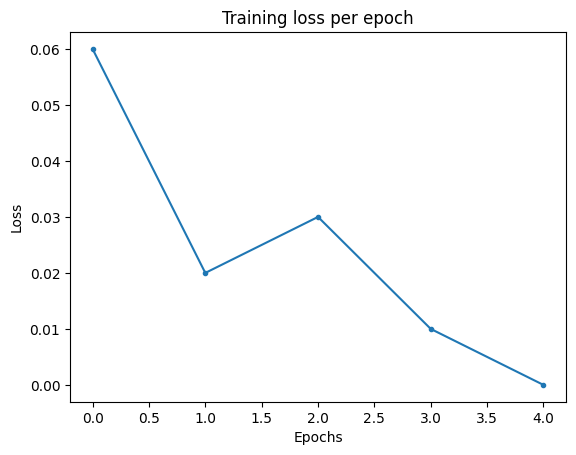

In [279]:
plt.plot(loss, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss per epoch')
plt.show()

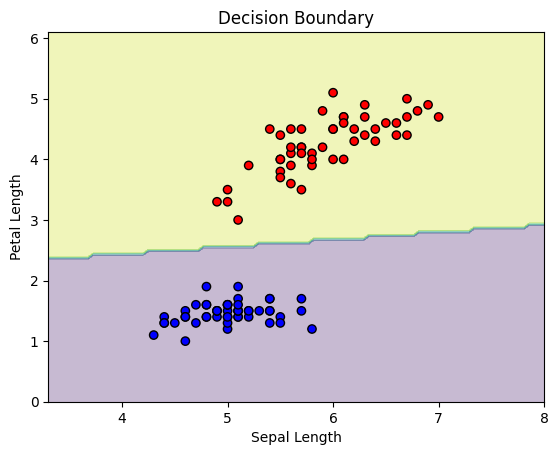

In [280]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Compute predictions for grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', marker='o')
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Decision Boundary')
    plt.show()

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
plot_decision_boundary(X, y, iris_model)

In [300]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [301]:
X_train.shape

(60000, 28, 28)

In [302]:
y_train.shape

(60000,)

In [303]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [304]:
train_mask= (y_train==0) | (y_train==1)
test_mask= (y_test==0) | (y_test==1)

X_train= X_train[train_mask]
y_train= y_train[train_mask]

X_test= X_test[test_mask]
y_test= y_test[test_mask]

print(X_train.shape)
print(y_train.shape)

(12665, 28, 28)
(12665,)


In [305]:
X_train=X_train.reshape((X_train.shape[0],-1))
X_test=X_test.reshape((X_test.shape[0],-1))
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
print(X_train.shape)
print(y_train.shape)

(12665, 784)
(12665, 1)


In [306]:
from sklearn.preprocessing import  StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [307]:
images= Perceptron(X_train.shape[1],epochs=100)
loss=images.fit(X_train,y)
y_test_pred=images.predict(X_test)
loss= np.array(loss)
y_pred= [images.predict(x) for x in X_train]
print("Percentage Training loss per epoch: ", loss)

Training completed after  48 epochs
Percentage Training loss per epoch:  [58 40 27 16 22 14  8  9  9  5  8  8  7  8  6  8  6  6  6  6  7  7  6  4
  4  5  5  4  3  2  2  2  2  2  2  2  2  2  2  4  2  4  6  7  2  2  2  2
  0]


In [308]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test,y_test_pred),2).item()

0.47